Optimal distribution center locations:
Center 1: Latitude 31.4209, Longitude -92.0010
Center 2: Latitude 40.7183, Longitude -74.0122
Center 3: Latitude 34.0576, Longitude -118.2504
Total weighted distance cost: 187490.32


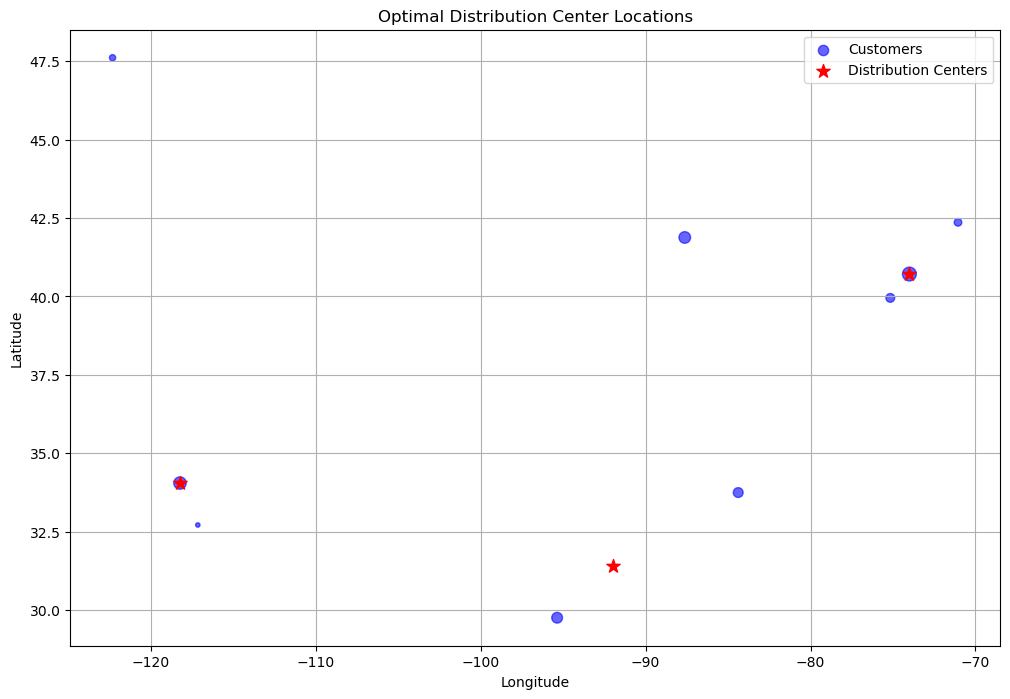

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define customer locations (latitude, longitude) and their demand
customers = np.array([
    (40.7128, -74.0060, 100),  # New York
    (34.0522, -118.2437, 80),  # Los Angeles
    (41.8781, -87.6298, 70),   # Chicago
    (29.7604, -95.3698, 60),   # Houston
    (33.7490, -84.3880, 50),   # Atlanta
    (39.9526, -75.1652, 40),   # Philadelphia
    (42.3601, -71.0589, 30),   # Boston
    (47.6062, -122.3321, 20),  # Seattle
    (32.7157, -117.1611, 10),  # San Diego
])

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate the great circle distance between two points on the earth"""
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

def objective_function(positions):
    """
    Calculate total weighted distance from distribution centers to customers.
    positions: array of shape (n_centers, 2) for latitude and longitude of each center
    """
    total_cost = 0
    for customer in customers:
        distances = haversine_distance(positions[:, 0], positions[:, 1], customer[0], customer[1])
        nearest_center_distance = np.min(distances)
        total_cost += nearest_center_distance * customer[2]  # distance * demand
    return total_cost



class Particle:
    def __init__(self, bounds, n_centers):
        self.position = np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(n_centers, 2))
        self.velocity = np.zeros_like(self.position)
        self.best_position = np.copy(self.position)
        self.best_score = float('inf')



def particle_swarm_optimization(objective, bounds, n_centers, num_particles, num_iterations):
    particles = [Particle(bounds, n_centers) for _ in range(num_particles)]
    global_best_position = np.zeros((n_centers, 2))
    global_best_score = float('inf')

    w = 0.5  # inertia weight
    c1 = 1   # cognitive parameter
    c2 = 2   # social parameter

    for _ in range(num_iterations):
        for particle in particles:
            score = objective(particle.position)
            if score < particle.best_score:
                particle.best_score = score
                particle.best_position = particle.position
            if score < global_best_score:
                global_best_score = score
                global_best_position = particle.position

        for particle in particles:
            r1, r2 = np.random.rand(2)
            particle.velocity = (w * particle.velocity + 
                                 c1 * r1 * (particle.best_position - particle.position) + 
                                 c2 * r2 * (global_best_position - particle.position))
            particle.position = np.clip(particle.position + particle.velocity, bounds[:, 0], bounds[:, 1])

    return global_best_position, global_best_score




# Set up the optimization problem
bounds = np.array([[25, 50], [-125, -65]])  # Latitude and Longitude bounds for USA
n_centers = 3  # Number of distribution centers to optimize
num_particles = 50
num_iterations = 200






# Run PSO
best_positions, best_score = particle_swarm_optimization(objective_function, bounds, n_centers, num_particles, num_iterations)




print(f"Optimal distribution center locations:")
for i, pos in enumerate(best_positions):
    print(f"Center {i+1}: Latitude {pos[0]:.4f}, Longitude {pos[1]:.4f}")
print(f"Total weighted distance cost: {best_score:.2f}")





# Visualize the result
plt.figure(figsize=(12, 8))
plt.scatter(customers[:, 1], customers[:, 0], c='blue', s=customers[:, 2], alpha=0.6, label='Customers')
plt.scatter(best_positions[:, 1], best_positions[:, 0], c='red', s=100, marker='*', label='Distribution Centers')
plt.title('Optimal Distribution Center Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()
